# Задание 1

Теоретически найти оптимальное расстояние (имеющее минимальную оценку для суммарной ошибки) между точками, используемыми для вычисления производной. Сравнить фактическую ошибку с теоретической оценкой.

----------------------

$\bf{Решение:}$

Ошибка при вычислении $p'(x_i)$:

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $\frac{M_2 \tau}{2}$  | $ \frac{2\Delta p}{\tau} $ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $\frac{M_3 \tau^2}{6}$  | $\frac{2\Delta p}{2\tau} = \frac{\Delta p}{\tau}$  |

Тогда полная ошибка равна: $\Delta f = \frac{M_3 \tau^2}{6} + \frac{\Delta p}{\tau}$ $\Rightarrow$ $(\frac{M_3 \tau^2}{6} + \frac{\Delta p}{\tau})' = \frac{M_3 \tau}{3} - \frac{\Delta p}{\tau^2} = 0$ $\Rightarrow$ $\tau_{опт} = \sqrt{\frac{3\Delta p}{M_3}}$


# Задание 2

Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = \dots + 0.5 \xi_i, \quad \xi_i\sim\mathcal N(0, 1)$. Экспериментально проверить оптимальность этого значения.

---

$\textbf{Решение}$:

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as spline

Text(0, 0.5, 'p')

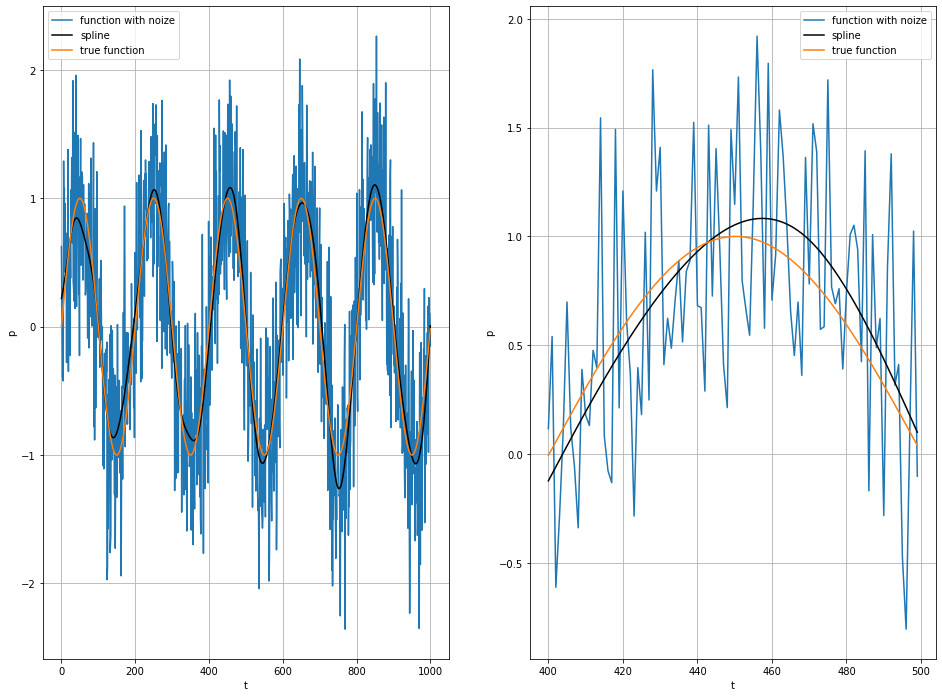

In [270]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000
w = 0.0314

# Смоделируем измерения с погрешностью
p = np.sin(w*t)+ 0.5 * np.random.randn(len(t))
# p = p0 / (1 + t / t0) + 0.5 * np.random.randn(len(t))

# Истинное значение функции - для сравнения
pprime = np.sin(w*t) 
# pprime = p0 / (1 + t / t0)

# Истинное значение производной функции - для сравнения
pstreak = w*np.cos(w*t)

#Интерполированная функция
count = 1
spl = list()
for i in range(count):
    spl.append(spline(t, p, s = 250 + i))

plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.plot(t, p, label='function with noize')
for i in range(count):
    plt.plot(t, spl[i](t), 'k', label = 'spline')
# plt.plot(t, spl(t))
plt.plot(t, pprime, label='true function')
plt.legend()
plt.grid()
plt.xlabel('t'); plt.ylabel('p')
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500], label='function with noize')
for i in range(count):
    plt.plot(t[400:500], spl[i](t[400:500]), 'k', label = 'spline')
# plt.plot(t[400:500], spl(t[400:500]))
plt.plot(t[400:500], pprime[400:500], label='true function')
plt.grid()
plt.legend()
plt.xlabel('t'); plt.ylabel('p')

$\textbf{Ответ}$: Для функции $p(t) = \displaystyle\frac{p_0}{1 + \frac{t}{t_0}}$ достаточно параметра сглаживания s = 250. В то же время для функции p = sin(0.0314*t) этого значения недостаточно, ей нужен параметр s = 260. Значит для разных функций нужны разные параметры сглаживания, хотя и приблизительно одного порядка.

# Задание 3.

При дифференцировании функций имеются два основных источника погрешности

- Ошибка метода - уменьшается при уменьшении $\boldsymbol{h}$

- Ошибка вычислений - растет при уменьшении $\boldsymbol{h}$


Поскольку характер роста ошибок различный, существует некоторое значение $h^{*}$, при котором ошибка минимальна. Рассмотрите полную ошибку
$\varepsilon_{\text {total }}=\varepsilon_{\text {method }}+\varepsilon_{\text {comp }}$
как функцию от $h$ для формулы центральной разности и найдите минимум. 

$$
f^{\prime}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$


Максимум модуля пятой  производной в окрестности $x_{0}$ оценивайте как $M_{5}$, ошибку вычисления $f$ как $\Delta f$.

$\textbf{Решение}$: Найдем ошибки аппроксимации и вычислений для заданной функции:

| Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|
| $\frac{M_5 h^4}{120}$  | $ \frac{18(\Delta f)}{12 h} = \frac{3}{2}\frac{\Delta f}{h}$ |

Тогда полная ошибка есть $\varepsilon(h) = \frac{M_5 h^4}{120} + \frac{3}{2}\frac{\Delta f}{h} = \frac{M_5 h^5}{120}\frac{1}{h} + \frac{3}{2}\frac{\Delta f}{h} = \frac{M_5 h^5 + 180(\Delta f)}{120 h}$. Найдем ее минимум: $\varepsilon(h^*)' = \frac{M_5 (h^*)^3}{30} - \frac{3}{2}\frac{\Delta f}{(h^*)^2} = 0 \Rightarrow h^* = \sqrt[5]{\frac{45 (\Delta f)}{M_5}}$.



И значение ошибки равно: $\varepsilon(h^*) = \frac{225(\Delta f)}{120}\cdot\sqrt[5]\frac{M_5}{45(\Delta f)} = \frac{15(\Delta f)}{8}\cdot\sqrt[5]\frac{M_5}{45(\Delta f)}$.

# Задание 4.

Используя сглаженные данные из задания 2, постройте график производной с помощью формулы из задания 3. Сравнить фактическую ошибку вычисления производной с теоретической оценкой из задания 3. Также сравнить, используя для вычисления производной не соседние точки, а точки на расстоянии, определённом из задания 1.

$\textbf{Решение}$:

error = 1.0173617365216714e-09


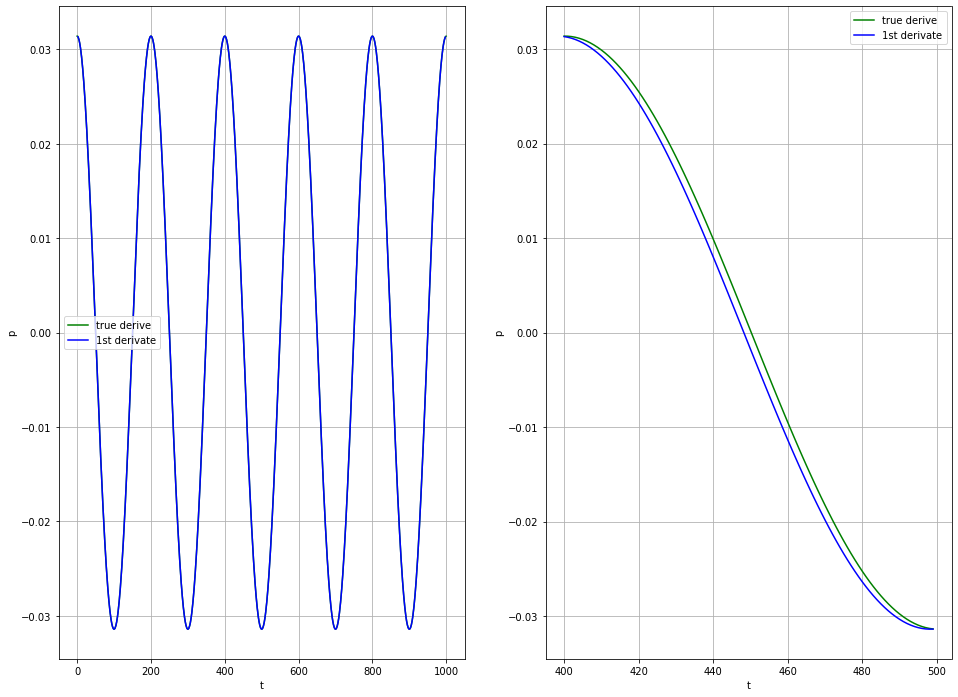

In [282]:
def diff(x, f, i) -> float:
    h = x[i] - x[i - 1]
    return (f[i-2] - 8*f[i-1] + 8*f[i+1] - f[i+2])/(12*h)

def diff171(x, f, i):
    h = x[i] - x[i - 171]
    return (f[i-2] - 8*f[i-1] + 8*f[i+1] - f[i+2])/(12*h)

splstreak = [diff(t, pprime, i) for i in range(2, len(t)- 2)]

plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
# plt.plot(t, pprime, 'r', label='function with noize')
plt.plot(t, pstreak, 'g', label='true derive')
plt.plot(t[2:len(t) - 2], splstreak, 'b', label='1st derivate')
# for i in range(count):
#     plt.plot(t, spl[i](t), 'k', label = 'spline')
# plt.plot(t, spl(t))
# plt.plot(t, pprime, label='true function')
plt.legend()
plt.grid()
plt.xlabel('t'); plt.ylabel('p')

plt.subplot(1, 2, 2)
# plt.plot(t[400:500], pprime[400:500], 'r', label='function with noize')
plt.plot(t[400:500], pstreak[400:500], 'g', label='true derive')
plt.plot(t[400:500], splstreak[400:500], 'b', label='1st derivate')
# for i in range(count):
#     plt.plot(t, spl[i](t), 'k', label = 'spline')
# plt.plot(t, spl(t))
# plt.plot(t, pprime, label='true function')
plt.legend()
plt.grid()
plt.xlabel('t'); plt.ylabel('p')

print('error = ' + str(np.abs(pstreak[2:-2] - splstreak).max()) )

Подставим конкретные значения: $h = 1, \Delta f \approx 0.3$ (3 стандартных отклонения). В качестве оценок для максимума возьмем:
$$
M_5 = \omega^5 \Leftarrow sin(\omega t) = 
\sum_{n=0}^\infty (-1)^n \omega^{2n+1}\frac{t^{2n+1}}{(2n+1)!}
$$

Тогда $\varepsilon = \frac{(0.0314)^5 + 180*0.3}{120 * 1} = \frac{54 + 3.052 * 10^{−8}}{120} \approx  0,45000000025 \neq 1.01736 *10^{-9}$.

$h_{опт} = \sqrt{\frac{3\Delta f}{M_3}} = \sqrt{\frac{3 \cdot 0.3}{(0,0314)^3}} \approx 171$